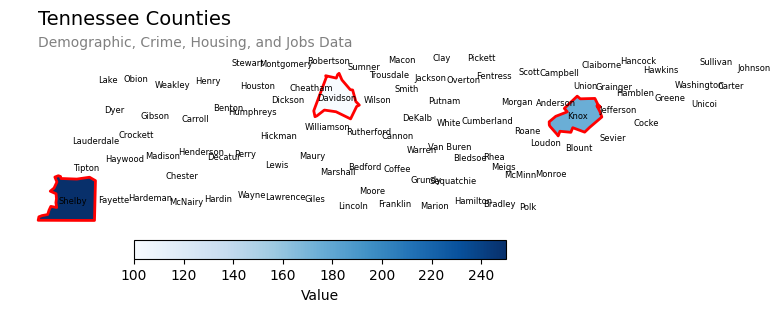

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1. Load US county shapefile
# ---------------------------
url = "https://www2.census.gov/geo/tiger/GENZ2022/shp/cb_2022_us_county_20m.zip"
counties = gpd.read_file(url)

# Filter Tennessee (STATEFP = 47)
tn_counties = counties[counties["STATEFP"] == "47"]

# ---------------------------
# 2. Example county-level data
#    (replace with your own)
# ---------------------------
data = pd.DataFrame(
    {
        "GEOID": ["47037", "47157", "47093"],  # Davidson, Shelby, Knox
        "value": [100, 250, 175],
    }
)

# Merge data with geometry
tn_map = tn_counties.merge(data, on="GEOID", how="left")

# ---------------------------
# 3. Counties to highlight
# ---------------------------
highlight_fips = ["47037", "47157", "47093"]
highlighted = tn_map[tn_map["GEOID"].isin(highlight_fips)]

# ---------------------------
# 4. Create plot
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 8))

# Base choropleth (color scaling)
tn_map.plot(
    column="value",
    cmap="Blues",
    linewidth=0.5,
    edgecolor="white",
    legend=True,
    ax=ax,
    legend_kwds={
        "orientation": "horizontal",
        "shrink": 0.6,  # ← key line
        "label": "Value",
        "fraction": 0.04,
        "pad": 0.02,
    },
)


# ax.legend(
#     fontsize=8,
#     frameon=True,
#     borderpad=0.3,
#     labelspacing=0.3,
#     handlelength=1,
#     handletextpad=0.4,
# )
# Highlight selected counties
highlighted.plot(ax=ax, facecolor="none", edgecolor="red", linewidth=2)

# ---------------------------
# 5. Label county names
# ---------------------------
for _, row in tn_map.iterrows():
    if not row.geometry.is_empty:
        x, y = row.geometry.centroid.x, row.geometry.centroid.y
        ax.text(x, y, row["NAME"], fontsize=6, ha="center", va="center")

# ---------------------------
# 6. Final touches
# ---------------------------
ax.set_title("Tennessee Counties", pad=30, fontsize=14, x=0.2)
ax.text(
    0.045,
    1.12,
    "Demographic, Crime, Housing, and Jobs Data",
    transform=ax.transAxes,
    ha="left",
    fontsize=10,
    color="gray",
)
ax.axis("off")

plt.show()